In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## About order_flow_aggregated.py

Python proof-of-concept indicator, yet to be developed for cTrader trading platform!

Actually, it's a conjunction of Volume Profile _(Ticks)_ + Order Flow Ticks indicators.
* Volume Profile _(intervals/values)_ for Aggregate Order Flow data.
* Volume Profile _(segmentation)_ to calculate the Order Flow of each bar.

This 'combination' gives the quality that others footprint/order-flow software have:
* **Aligned Rows** for all bars on the chart, or - in our case, at the given interval.
* **Possibility to create a truly (Volume, Delta) Bubbles chart.**

It's means that _**Order Flow Ticks**_ is wrong / no longer useful? Absolutely not! Think about it:
* With ODF_Ticks you get **-> exactly <-** what happened **_inside a bar_**, it's like looking at:
    * a microstructure (ticks) through a microscope (bar segments) using optical zoom (bar).
* With ODF_Aggregated you get a **-> structured view <-** of what happened **_inside the bars_**, it's like looking at:
    * a microstructure (ticks) through a filter lens (VP segments) of a microscope (VP values) using digital zoom (VP interval).

In other words:
* Order Flow Ticks - raw detail.
* Order Flow Aggregated - compressed detail.

To be fair, this 'idea' _(aggregate order flow by volume profile intervals)_ has been stuck in my mind since I developed
my last indicator for cTrader (Volume Profile) in 2023.

Time passes and unexpected things happen in our surroundings that I completely forgot the desire to develop this.

In [2]:
# for interactive charts, change to 'plotly_mimetype' or 'notebook'
renderer = 'png'

import pandas as pd
from order_flow_ticks import OrderFlowTicks

df_ticks = pd.read_parquet(f"data/US30_T1_2025_cT.parquet")
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

df_ohlc = pd.read_parquet(f"data/US30_1Minute_2025_cT.parquet")
df_ohlc = df_ohlc.resample('15min').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

In [3]:
from order_flow_aggregated import OrderFlowAggregated
from order_flow_ticks import OrderFlowTicks

odf_agg = OrderFlowAggregated(df_ohlc, df_ticks, 3, pd.Timedelta(days=1))
odft = OrderFlowTicks(df_ohlc, df_ticks, 3)

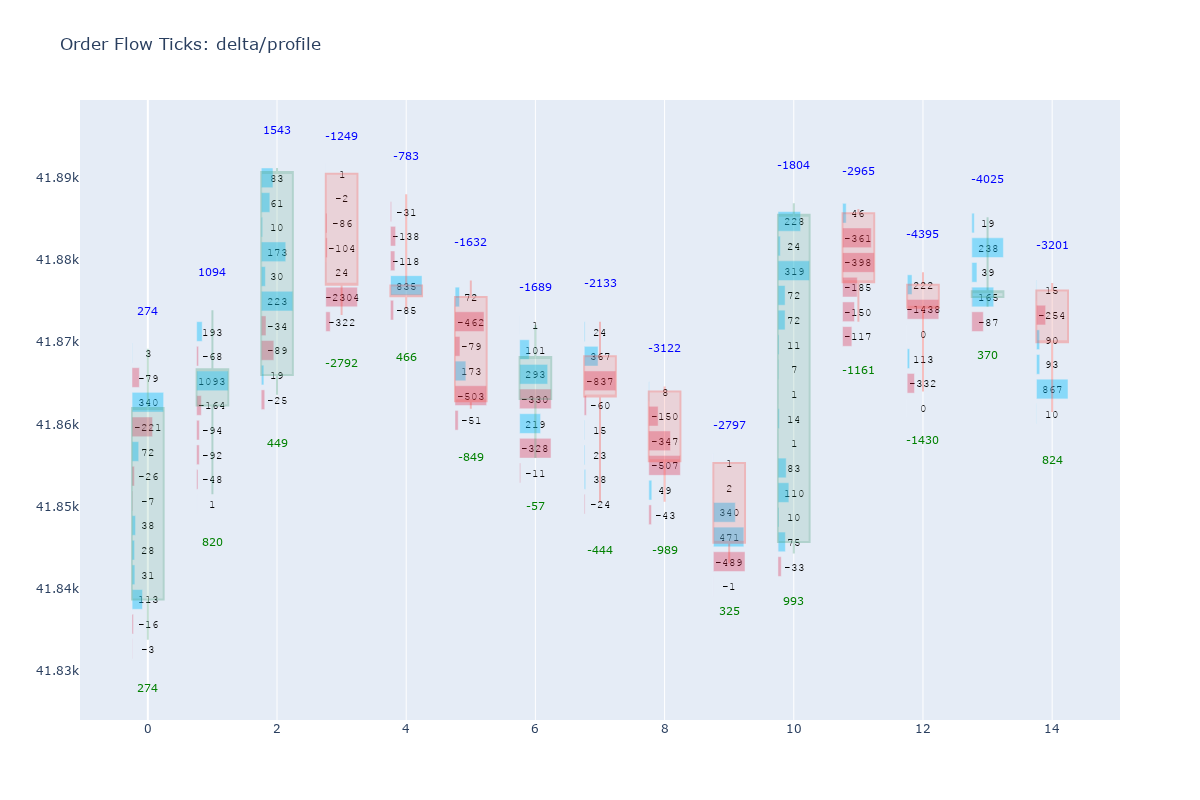

In [4]:
odft.plot(iloc_value=15, chart='candle', renderer=renderer)

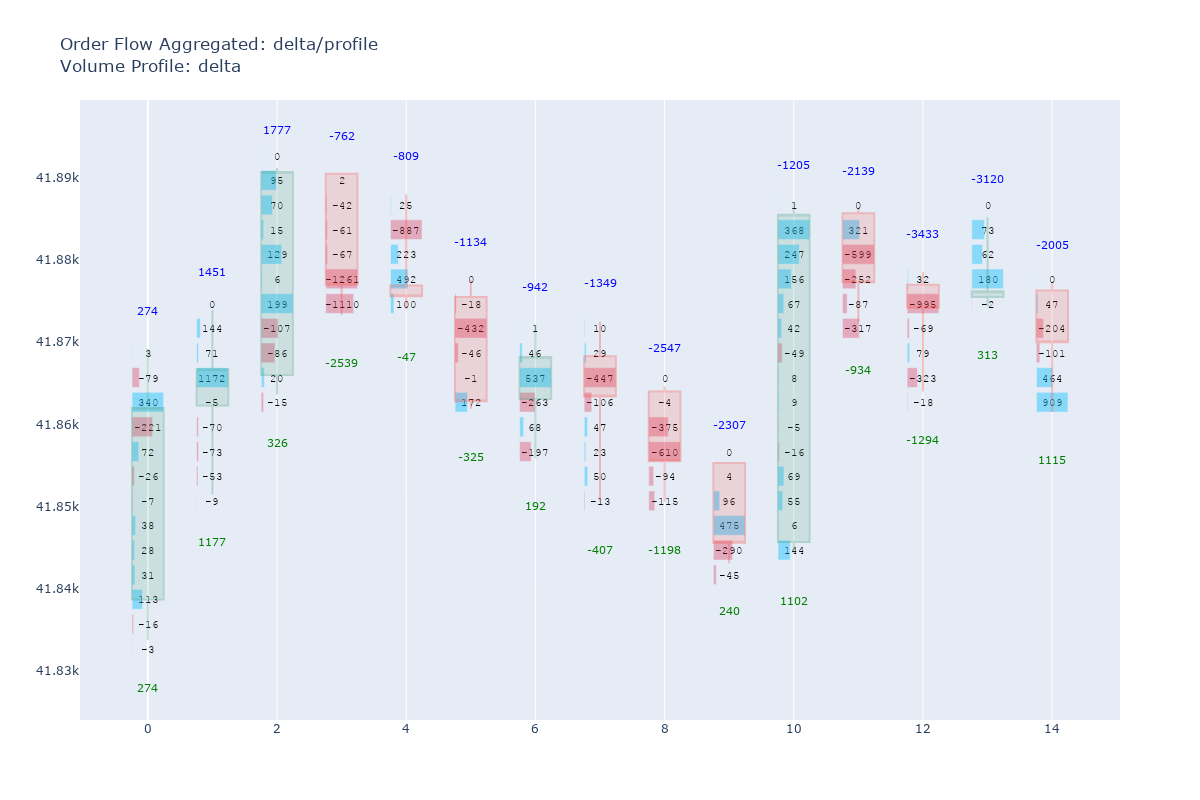

In [5]:
odf_agg.plot(iloc_value=15, chart='candle', renderer=renderer, show_profiles=False)

#### Note that the first bar values are the same as Order Flow Ticks, after that, the next bars values start to diverge due to these aligned lines.

### Let's see the Volume Profile.

In [6]:
# Resample and increacse row_height because show_profiles=True plot all profiles intervals, so we can see the numbers!
df_ohlc = pd.read_parquet(f"data/US30_1Minute_2025_cT.parquet")
df_ohlc = df_ohlc.resample('30min').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
odf_agg = OrderFlowAggregated(df_ohlc, df_ticks, 20, pd.Timedelta(days=1))

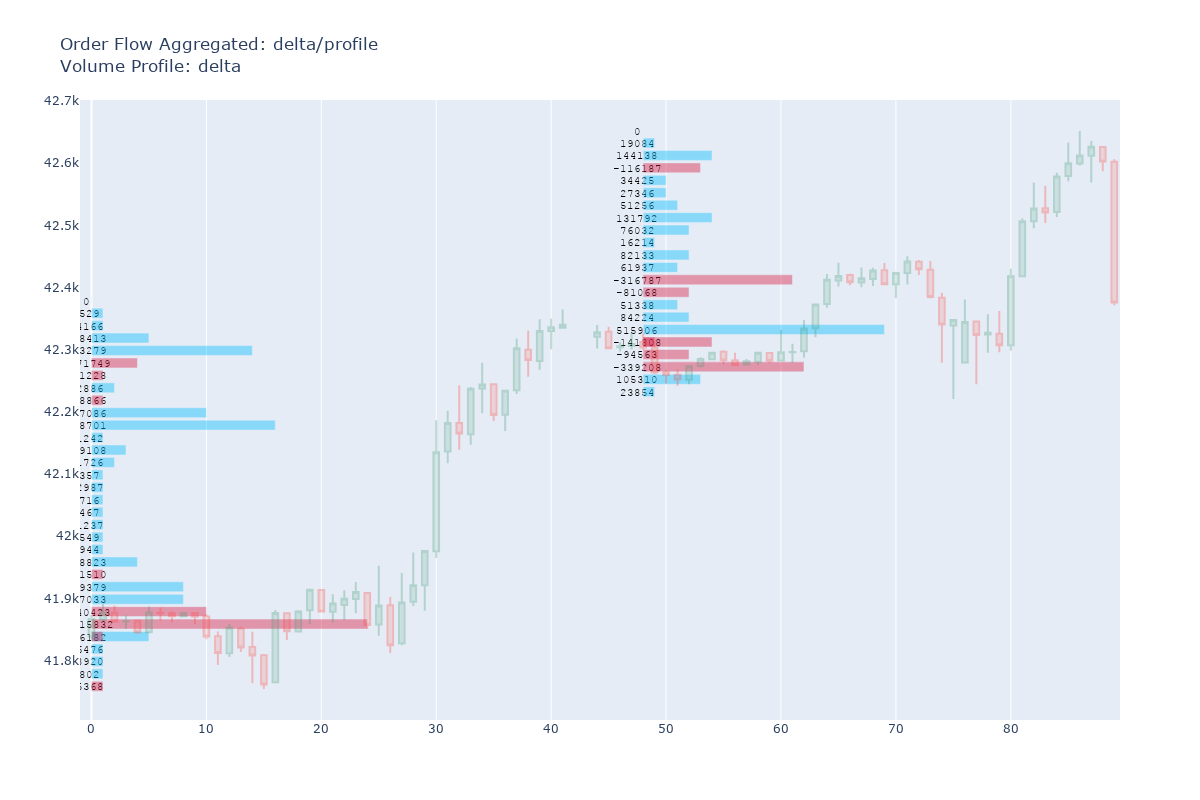

In [7]:
odf_agg.plot(iloc_value=300, mode='delta', chart='candle', renderer=renderer, show_profiles=True, show_odf=False)

### With both _(show_profiles=True, show_odf=True)_, it's better to see with an interactive rendering mode

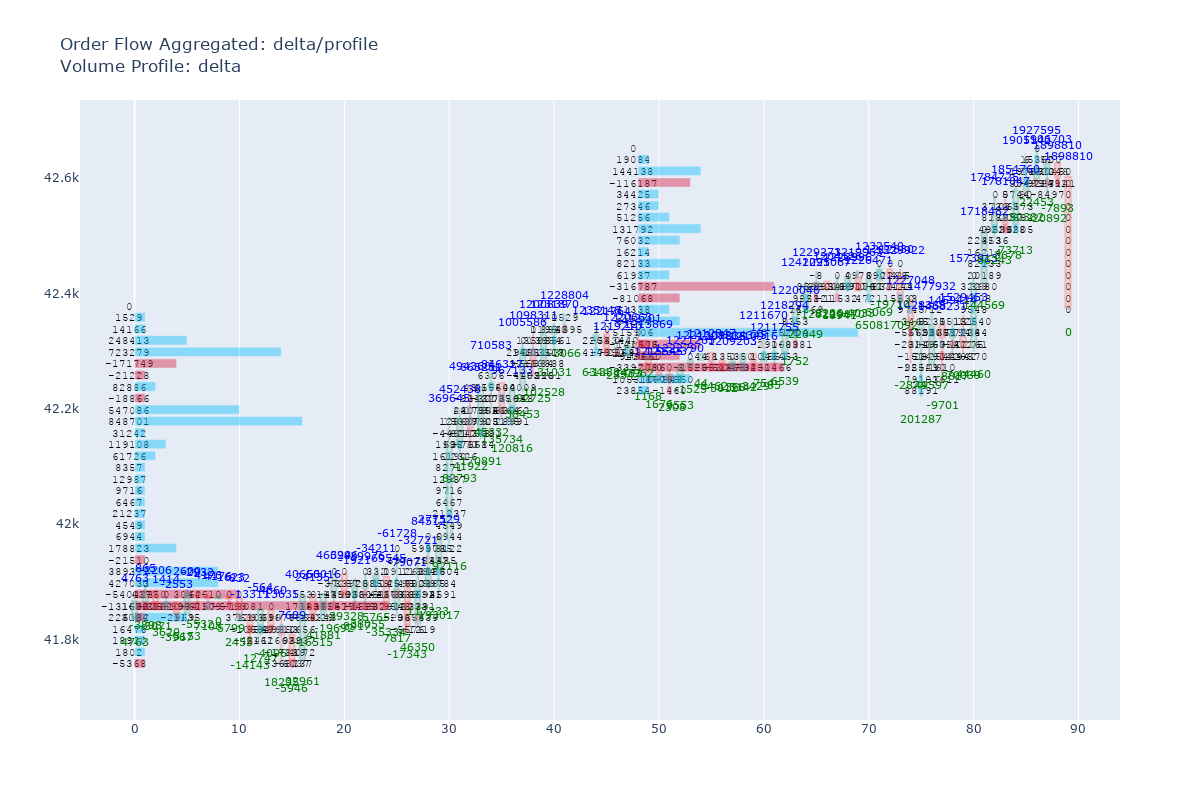

In [8]:
odf_agg.plot(iloc_value=300, mode='delta', chart='candle', renderer=renderer, show_profiles=True, show_odf=True)

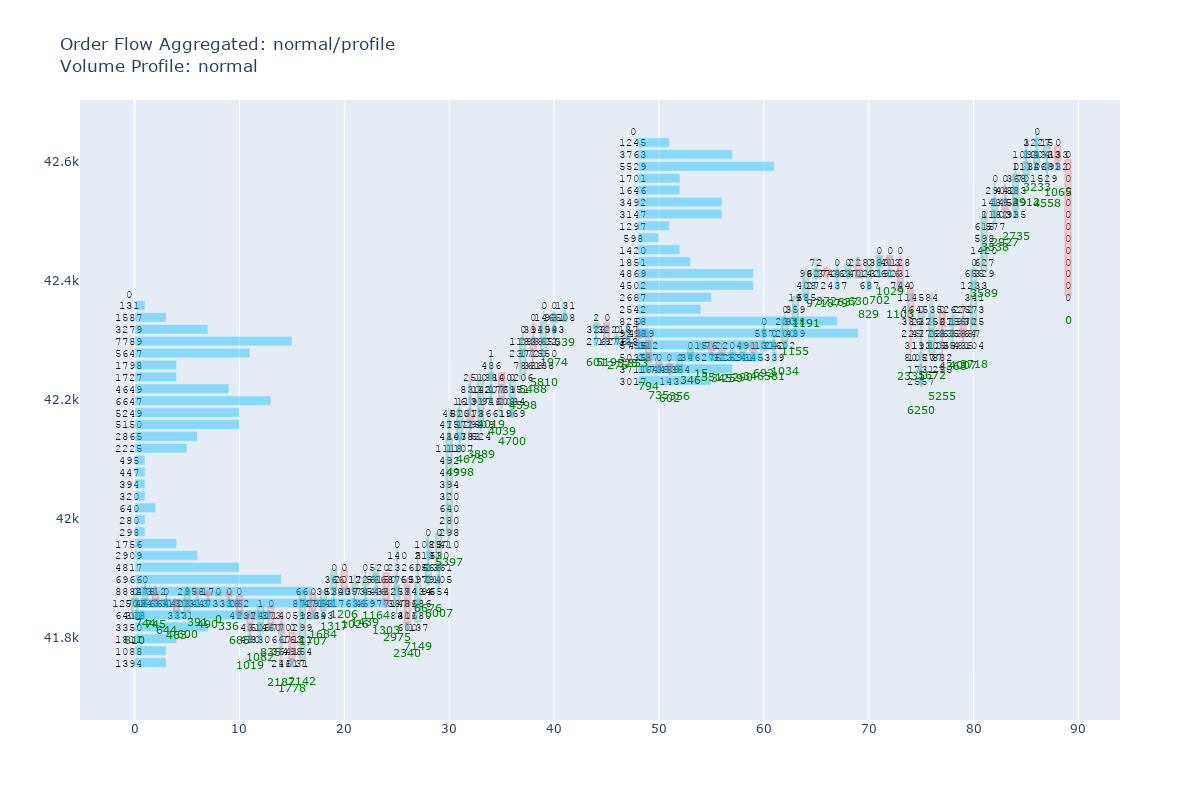

In [9]:
odf_agg.plot(iloc_value=300, mode='normal', chart='candle', renderer=renderer, show_profiles=True, show_odf=True)

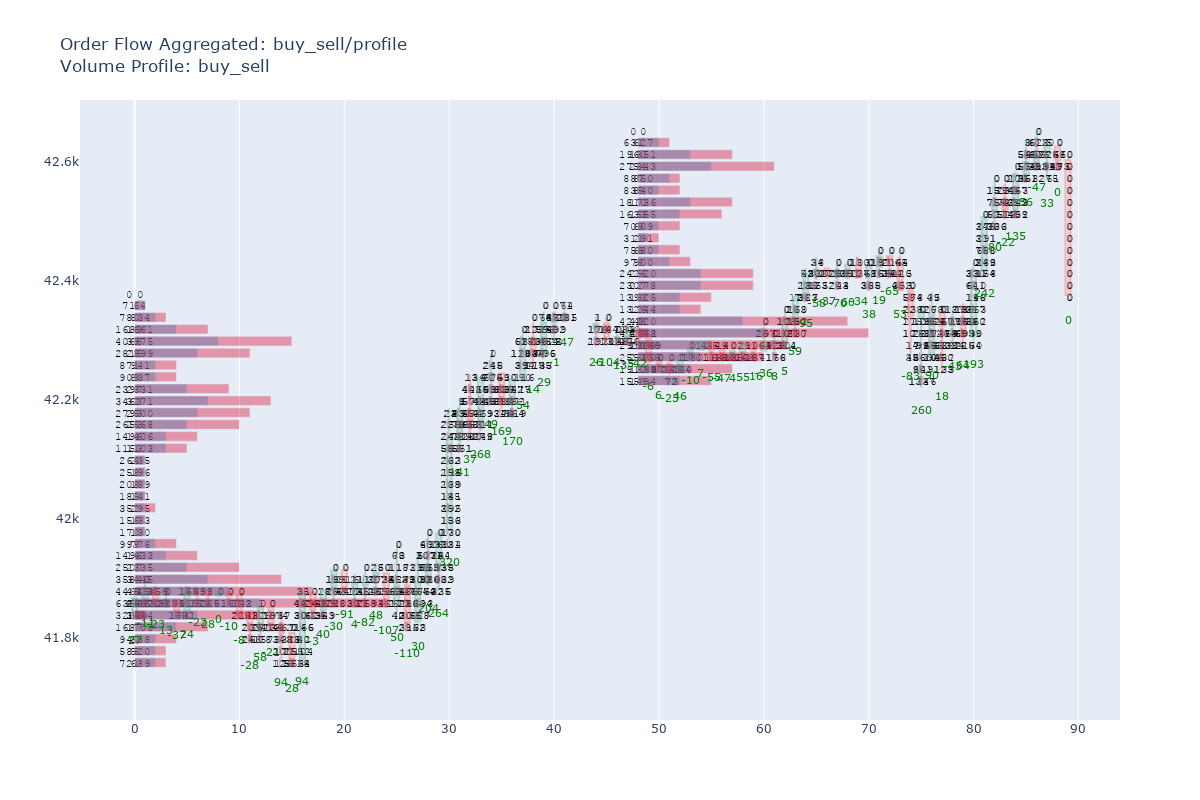

In [10]:
odf_agg.plot(iloc_value=300, mode='buy_sell', chart='candle', renderer=renderer, show_profiles=True, show_odf=True)